## Problem set 1, Intro to NLP, 2017

#### This is due on September 22nd at 11PM. Please see detailed submission instructions below.  100 points total.

##### How to do this problem set:

- What version of Python should I use? 2.7

- Most of these questions require writing Python code and computing results, and the rest of them have textual answers. To generate the answers, you will have to fill out a supporting file, `hw_1.py`.

- For all of the textual answers you have to fill out have placeholder text which says "Answer in one or two sentences here." For each question, you need to replace "Answer in one or two sentences here" with your answer.

- Write all the answers in this ipython notebook. Once you are finished (1) Generate a PDF via (File -> Download As -> PDF) and upload to Gradescope (2)Turn in `hw_1.py` and `hw_1.ipynb` on Moodle.
  
- **Important:** Check your PDF before you turn it in to gradescope to make sure it exported correctly. If ipyhton notebook gets confused about your syntax it will sometimes terminate the PDF creation routine early. You are responsible for checking for these errors. If your whole PDF does not print, try running `$jupyter nbconvert --to pdf hw_1.ipynb` to identify and fix any syntax errors that might be causing problems.

- **Important:** When creating your final version of the PDF to hand in, please do a fresh restart and execute every cell in order. Then you'll be sure it's actually right. One convenient way to do this is by clicking `Cell -> Run All` in the notebook menu.
 
- This assignment is designed so that you can run all cells in a few minutes of computation time. If it is taking longer than that, you probably have made a mistake in your code.

##### Academic honesty 

- We will audit the Moodle code from a few dozen students, chosen at random. The audits will check that the code you wrote and turned on Moodle generates the answers you turn in on your Gradescope PDF. If you turn in correct answers on your PDF without code that actually generates those answers, we will consider this a potential case of cheating. See the course page for honesty policies.

- We will also run automatic checks of code on Moodle for plagiarism. Copying code from others is considered a serious case of cheating.

In [41]:
# Run this cell! It sets some things up for you.

# This code makes plots appear inline in this document rather than in a new window.
import matplotlib.pyplot as plt
from __future__ import division  # this line is important to avoid unexpected behavior from division

# This code imports your work from hw_1.py
from hw_1 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 4) # set default size of plots

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
# download the IMDB large movie review corpus from the class webpage to a file location on your computer

PATH_TO_DATA = 'large_movie_review_dataset'  # set this variable to point to the location of the IMDB corpus on your computer
POS_LABEL = 'pos'
NEG_LABEL = 'neg'
TRAIN_DIR = os.path.join(PATH_TO_DATA, "train")
TEST_DIR = os.path.join(PATH_TO_DATA, "test")

for label in [POS_LABEL, NEG_LABEL]:
    if len(os.listdir(TRAIN_DIR + "/" + label)) == 12500:
        print "Great! You have 12500 {} reviews in {}".format(label, TRAIN_DIR + "/" + label)
    else:
        print "Oh no! Something is wrong. Check your code which loads the reviews"

Great! You have 12500 pos reviews in large_movie_review_dataset/train/pos
Great! You have 12500 neg reviews in large_movie_review_dataset/train/neg


In [43]:
# Actually reading the data you are working with is an important part of NLP! Let's look at one of these reviews

print open(TRAIN_DIR + "/neg/3740_2.txt").read()

Right away, this film was ridiculous. Not that it didn't have redeeming aspects For example, the best thing about this film was the beautiful background scenery. Anyone not living on the East Coast should know the South doesn't have beautiful mountains like those found in the West. I knew it was Utah right off the bat, but perhaps Dalton couldn't suppress his English accent, so they had to excuse it by saying this was a southern town. Subverting his accent into a Southern one was easier. Sure the film has plot twists, but its phony sense of place was something I couldn't get past. It's not like Utah doesn't have meth labs... so why the writers thought it necessary to pretend it was in the South is beyond me. <br /><br />One other thing in action pictures always puzzles me. Why do they always make the "cocking" sound effect when the character pulls out an automatic handgun? It seemed every other sound effect in this movie was a "chuk-chich" signifying a 9mm was loaded and ready to fire

## Part One: Intro to NLP in Python: types, tokens and Zipf's law

#### Types and tokens

One major part of any NLP project is word tokenization. Word tokenization is the task of segmenting text into individual words, called tokens. In this assignment, we will use simple whitespace tokenization. You will have a chance to improve this for extra credit at the end of the assigment. Take a look at the `tokenize_doc` function in `hw_1.py`. **You should not modify tokenize_doc** but make sure you understand what it is doing.

In [44]:
# We have provided a tokenize_doc function in hw_1.py. Here is a short demo of how it works

d1 = "This SAMPLE doc has   words tHat  repeat repeat"
bow = tokenize_doc(d1)

assert bow['this'] == 1
assert bow['sample'] == 1
assert bow['doc'] == 1
assert bow['has'] == 1
assert bow['words'] == 1
assert bow['that'] == 1
assert bow['repeat'] == 2

bow2 = tokenize_doc("Computer science is both practical and abstract.")
for b in bow2:
    print b

and
both
computer
abstract.
science
is
practical


**Question 1.1 (5 points)**

Now we are going to count the word types and word tokens in the corpus. In the cell below, use the `word_counts` dictionary variable to store the count of each word in the corpus.
Use the `tokenize_doc` function to break documents into tokens. 

`word_counts` keeps track of how many times a word type appears across the corpus. For instance, `word_counts["dog"]` should store the number 723 -- the count of how many times the word `dog` appears in the corpus.

In [45]:
import glob
word_counts = defaultdict(int)  # you might want to use a defaultdict instead https://docs.python.org/2/library/collections.html
                  # defaultdicts are often useful for NLP in python

for label in [POS_LABEL, NEG_LABEL]:
    for directory in [TRAIN_DIR, TEST_DIR]:
        for fn in glob.glob(directory + "/" + label + "/*txt"):
            ## Implement me!
            doc = open(fn).read()
            for key,val in tokenize_doc(doc).items():
                word_counts[key]+=val
print word_counts["dog"]
            

990.0


In [37]:
# you should see 990 instances of the word type "dog" in the corpus. 
if word_counts["dog"] == 990:
    print "yay! there are {} total instances of the word type dog in the corpus".format(word_counts["dog"])
else:
    print "hrm. Something seems off. Double check your code"

yay! there are 990.0 total instances of the word type dog in the corpus


**Question 1.2 (5 points)**

Fill out the functions `n_word_types` and `n_word_tokens` in `hw_1.py`. These functions return the total number of word types and tokens in the corpus. **important** The autoreload "magic" that you setup early in the assignment should automatically reload functions as you make changes and save. If you run into trouble you can always restart the notebook and clear any .pyc files.

In [38]:
print "there are {} word types in the corpus".format(n_word_types(word_counts))
print "there are {} word tokens in the corpus".format(n_word_tokens(word_counts))

there are 391997 word types in the corpus
there are 11557403.0 word tokens in the corpus


**Question 1.3 (5 points)**

You should see a much higher number of tokens than types. Why is that? 

Answer in one or two sentences here

** Many words are occuring multiple times. For example the word "dog" is appearing 723 times. This makes the token count much higher than types.**

#### Zipf's Law

**Question 1.4 (5 points)**

In this section, you will verify a key statistical properties of text: [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law).

Zipf's Law describes the relations between the frequency rank of words and frequency value of words.  For a word $w$, its frequency is inversely proportional to its rank:

$$count_w = K \frac{1}{rank_w}$$
or in other words
$$\log(count_w) = K - \log(rank_w)$$

for some constant $K$, specific to the corpus and how words are being defined.

Therefore, if Zipf's Law holds, after sorting the words descending on frequency, word frequency decreases in an approximately linear fashion under a log-log scale.

Please make such a log-log plot by ploting the rank versus frequency.  Use a scatter plot where the x-axis is the *log(rank)*, and y-axis is *log(frequency)*.  You should get this information from `word_counts`; for example, you can take the individual word counts and sort them.  dict methods `.items()` and/or `values()` may be useful.  (Note that it doesn't really matter whether ranks start at 1 or 0 in terms of how the plot comes out.) You can check your results by comparing your plots to ones on Wikipedia; they should look qualitatively similar.

*Please remember to label the meaning of the x-axis and y-axis.*

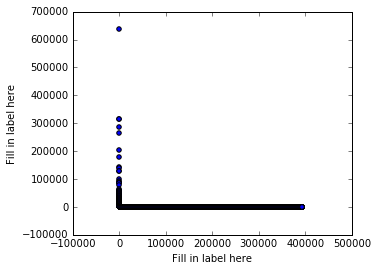

In [50]:
import math
x = []
y = []
X_LABEL = "Fill in label here"
Y_LABEL = "Fill in label here"

# implement me! you should fill the x and y arrays. Add your code here
rank_counts = sorted(word_counts.values(), reverse=True)
for i in xrange(len(rank_counts)):
    x.append(i+1)
    y.append(rank_counts[i])
plt.scatter(x, y)
plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)

**Question 1.5 (5 points)**

You should see some discountinuities on the left and right sides of this figure.  Why are we seeing them on the left?  Why are we seeing them on the right?  On the right, what are those "ledges"?

Answer in one or two sentences here.

## Part Two: Naive Bayes

This section of the homework will walk you through coding a Naive Bayes classifier that can distinguish between postive and negative reviews (at some level of accuracy).

**Question 2.1 (5 pts) ** To start, implement the `update_model` function in `hw_1.py`. Make sure to read the function comments so you know what to update. Also review the NaiveBayes class variables in the `def __init__` method of the NaiveBayes class  to get a sense of which statistics are important to keep track of. Once you have implemented `update_model`, run the train model function using the code below. You’ll need to provide the path to the dataset you downloaded to run the code.

In [ ]:
nb = NaiveBayes(PATH_TO_DATA, tokenizer=tokenize_doc)
nb.train_model()

if len(nb.vocab) == 252165:
    print "Great! The vocabulary size is {}".format(252165)
else:
    print "Oh no! Something seems off. Double check your code before continuing. Maybe a mistake in update_model?"

#### Exploratory analysis

Let’s begin to explore the count statistics stored by the update model function. Use the provided `top_n` function to find the top 10 most common words in the positive class and top 10 most common words in the negative class. You don't have to code anything to do this.

In [ ]:
print "TOP 10 WORDS FOR CLASS " + POS_LABEL + ":"
for tok, count in nb.top_n(POS_LABEL, 10):
    print '', tok, count
print ''

print "TOP 10 WORDS FOR CLASS " + NEG_LABEL + ":"
for tok, count in nb.top_n(NEG_LABEL, 10):
    print '', tok, count
print ''

**Question 2.2 (5 points)**

Will the top 10 words of the positive/negative classes help discriminate between the two classes? Do you imagine that processing other English text will result in a similar phenomenon?

Answer in one or two sentences here.

**Question 2.3 (5 pts) **

The Naive Bayes model assumes that all features are conditionally independent given the class label. For our purposes, this means that the probability of seeing a particular word in a document with class label $y$ is independent of the rest of the words in that document. Implement the `p_word_given_label` function. This function calculates P (w|y) (i.e., the probability of seeing word w in a document given the label of that document is y).

Use your `p_word_given_label` function to compute the probability of seeing the word “fantastic” given each sentiment label. Repeat the computation for the word “boring.” 

In [ ]:
print "P('fantastic'|pos):",  nb.p_word_given_label("fantastic", POS_LABEL)
print "P('fantastic'|neg):",  nb.p_word_given_label("fantastic", NEG_LABEL)
print "P('boring'|pos):",  nb.p_word_given_label("boring", POS_LABEL)
print "P('boring'|neg):",  nb.p_word_given_label("boring", NEG_LABEL)

Which word has a higher probability given the positive class, fantastic or boring? Which word has a higher probability given the negative class? Is this what you would expect?

Answer in one or two sentences here

**Question 2.4 (5 pts)**

In the next cell, compute the probability of the word "car-thievery" in the positive training data and negative training data.

In [ ]:
print "P('car-thievery'|pos):",  nb.p_word_given_label("car-thievery", POS_LABEL)
print "P('car-thievery'|neg):",  nb.p_word_given_label("car-thievery", NEG_LABEL)

What do you notice about "P('car-thievery'|neg)"? Why do you see this number? What would happen if we took the log of "P('car-thievery'|neg)"? What would happen if we multiplied "P('car-thievery'|neg)" by "P('cliche'|neg)"? Why might these operations cause problems for a Naive Bayes classifier?

Answer in one or two sentences here

**Question 2.5 (5 pts)**

We can address the issues from question 2.4 with psuedocounts. A psuedocount is a fixed amount added to the count of each word stored in our model. Psuedocounts are used to help smooth calculations involving words for which there is little data. Implement
`p_word_given_label_and_psuedocount` and then run the next cell. Hint: look at the slides from the lecture on pseudocounts.

In [ ]:
print "P('car-thievery'|neg):",  nb.p_word_given_label_and_pseudocount("car-thievery", NEG_LABEL, 1.0)

**Question 2.6 (getting ready for question 2.10)**

*Prior and Likelihood* 

As noted before, the Naive Bayes model assumes that all words in a document are independent of one another given the document’s label. Because of this we can write the likelihood of a document as:

$P(w_{d1},\cdots,w_{dn}|y_d) = \prod_{i=1}^{n}P(w_{di}|y_d)$

However, if a document has a lot of words, the likelihood will become extremely small and we’ll encounter numerical underflow. Underflow is a common problem when dealing with prob- abilistic models; if you are unfamiliar with it, you can get a brief overview on [Wikipedia](https:/en.wikipedia.org/wiki/Arithmetic_underflow). To deal with underflow, a common transformation is to work in log-space.

$\log[P(w_{d1},\cdots,w_{dn}|y_d)] = \sum_{i=1}^{n}\log[P(w_{di}|y_d)]$

Implement the `log_likelihood` function (Hint: it should make calls to the p word given label and psuedocount function).
Implement the `log_prior` function. This function takes a class label and returns the log of the fraction of the training documents that are of that label.

There is nothing to print out for this question. But you will use these functions in a moment...

**Question 2.7 (5 pts) **

Naive Bayes is a model that tells us how to compute the posterior
probability of a document being of some label (i.e.,
$P(y_d|\mathbf{w_d})$).  Specifically, we do so using bayes rule:

  $P(y_d|\mathbf{w_d}) = \frac{P(y_d)P(\mathbf{w_d}|y_d)}{P(\mathbf{w_d})}$

In the previous section you implemented functions to compute both
the log prior ($\log[P(y_d)]$) and the log likelihood
($\log[P( \mathbf{w_d} |y_d)]$ ). Now, all your missing is the
*normalizer*, $P(\mathbf{w_d})$.

Derive the normalizer by expanding $P(\mathbf{w_d})$. You will have to use "MathJax" to write out the equations. MathJax is very similar to LaTeX. 99% of the MathJax you will need to write for this course (and others at U Mass) is included in the first answer of [this](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) tutorial. MathJax and LaTeX can be annoying first, but once you get a little practice, using these tools will feel like second nature.


Derive the normalizer by expanding $P(\mathbf{w_d})$. Fill out the answer with MathJax here

**Question 2.8 (5 pts)**

One way to classify a document is to compute the unnormalized log posterior for both labels and take the argmax (i.e., the label that yields the higher unnormalized log posterior). The unnormalized log posterior is the sum of the log prior and the log likelihood of the document. Why don’t we need to compute the log normalizer here?

Answer in one or two sentences here.

**Question 2.9 (15 pts)**

Implement the `unnormalized_log_posterior` function and the `classify` function. The `classify` function should use the unnormalized log posteriors but should not compute the normalizer. Once you implement the `classify` function, we'd like to evaluate its accuracy. `evaluate_classifier_accuracy` is implemented for you so you don't need to change that method.

In [ ]:
print nb.evaluate_classifier_accuracy(1.0)

**Question 2.10 (5 pts)**

Try evaluating your model again with a pseudocount parameter of 500.

In [ ]:
print nb.evaluate_classifier_accuracy(500.0)

Does the accuracy go up or down when the pseudo count parameter is raised to 500? Why do you think this is?

Answer in one or two sentences here.

**Question 2.11 (5 pts)**

Our trained model can be queried to do exploratory data analysis. We
saw that the top 10 most common words for each class were not very
discriminative. Often times, a more descriminative statistic is a
word's likelihood ratio. A word's likelihood ratio is defined as

$LR(w)=\frac{P(w|y=\mathrm{pos})}{P(w|y=\mathrm{neg})}$

A word with $LR=5$ is five times more likely to appear in a positive
review than it is in a negative review; a word with $LR=0.33$ is one
third as likely to appear in a positive review than a negative review

In [ ]:
# Implement the nb.likelihod_ratio function and use it to investigate the likelihood ratio of "fantastic" and "boring"
print "LIKEHOOD RATIO OF 'fantastic':", nb.likelihood_ratio('fantastic', 1.0)
print "LIKEHOOD RATIO OF 'boring':", nb.likelihood_ratio('boring', 1.0)
print "LIKEHOOD RATIO OF 'the':", nb.likelihood_ratio('the', 1.0)
print "LIKEHOOD RATIO OF 'to':", nb.likelihood_ratio('to', 1.0)


Does it make sense that $LR$('fantastic') $>$ $LR$('to')? 

Answer in one or two sentences here.

** Question 2.12 (15 pts)** 

Find a review that your classifier got wrong. 

In [ ]:
# in this cell, print out a review that your classifier got wrong. Print out the text of the review along with the label

What are two reasons your system might have misclassified this example? What improvements could you make that may help your system classify this example correctly? 

Fill out reason nubmer 1 here | Fill out a possible improvement here


Fill out reason nubmer 2 here | Fill out a possible improvement here


**Extra credit (up to 10 points) **

If you don't want to do the extra credit, you can stop here! Otherwise... keep reading... 
 
In this assignment, we use whitespace tokenization to create a bag-of-unigrams representation for the movie reviews. It is possible to improve this represetation to improve your classifier's performance. Use your own code or an external library such as nltk to perform tokenization, text normalization, word filtering, etc. Fill out your work in `def tokenize_doc_and_more` (below) and then show improvement by running the following.

`nb = NaiveBayes(PATH_TO_DATA, tokenizer=tokenize_doc_and_more)
nb.train_model()
nb.evaluate_classifier_accuracy(1.0)
`

Roughly speaking, the larger performance improvement, the more extra credit. However, doing a good job investigating, explaining and justifying your work with small experiments and comments is also extremely important. Make sure to describe what you did and analyze why your method works. Use this ipython notebook to show your work.

In [ ]:
def tokenize_doc_and_more(doc):
    """
    Return some representation of a document.
    At a minimum, you need to perform tokenization, the rest is up to you.
    """
    # Implement me!
    bow = defaultdict(float)
    
    # your code goes here
    
    return bow

In [ ]:
nb = NaiveBayes(PATH_TO_DATA, tokenizer=tokenize_doc_and_more)
nb.train_model()
nb.evaluate_classifier_accuracy(1.0)

Use cells at the bottom of this notebook to explain what you did in `better_tokenize_doc`. Include any experiments or explanations that you used to decide what goes in your function. 

In [ ]:
# Your experiments and explanations go here